Analisis Data Penyewaan Sepeda: Bike Sharing Dataset

* Nama: Desnia Anindy Irni Hareva
* Email: desnia.anindy28@student.uns.ac.id
* ID Dicoding: desniaanindy

## Menentukan Pertanyaan Bisnis

1.   Bagaimana perbandingan tren penggunaan sepeda antara hari kerja (workday) dan hari libur (holiday)?
2.   Bagaimana distribusi penyewaan sepeda berdasarkan musim dan bagaimana pengaruhnya terhadap tipe pengguna (casual vs registered)?

Catatan:
* Pengguna Kasual (Casual): Pengguna yang menyewa sepeda tanpa pendaftaran keanggotaan, cenderung menggunakan layanan untuk rekreasi.
* Pengguna Terdaftar (Registered): Pengguna yang telah mendaftar sebagai anggota layanan, cenderung menggunakan sepeda sebagai transportasi harian/rutin.

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

## Data Wrangling

### Gathering Data

In [2]:
# Membaca dataset harian
daily_data = pd.read_csv("https://raw.githubusercontent.com/elvinojunior/dicoding_proyek_analisis_data/refs/heads/main/data/day.csv")
daily_data.head()

# Membaca dataset per jam
hourly_data = pd.read_csv("https://raw.githubusercontent.com/elvinojunior/dicoding_proyek_analisis_data/refs/heads/main/data/hour.csv")
hourly_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
* Dataset terdiri dari dua file utama: day.csv (data penyewaan harian) dan hour.csv (data penyewaan per jam)
* Data mencakup informasi seperti tanggal, status hari (kerja/libur), musim, cuaca, temperatur, dan jumlah penyewa (casual dan registered)
* Dataset ini merupakan data penyewaan sepeda dengan berbagai atribut yang mempengaruhi jumlah penyewaan


### Assessing Data

In [3]:
# Cek duplikasi data
print("Jumlah duplikasi pada data harian:", daily_data.duplicated().sum())
print("Jumlah duplikasi pada data per jam:", hourly_data.duplicated().sum())

# Statistik deskriptif
daily_data.describe()
hourly_data.describe()

# Informasi tentang dataset
daily_data.info()
hourly_data.info()

Jumlah duplikasi pada data harian: 0
Jumlah duplikasi pada data per jam: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.cor

**Insight:**
* Tidak terdapat duplikasi data pada kedua dataset
* Semua nilai statistik terlihat normal tanpa outlier yang signifikan
* Kolom 'dteday' perlu dikonversi ke format datetime untuk analisis temporal yang lebih baik

### Cleaning Data

In [4]:
# Konversi kolom tanggal ke format datetime
hourly_data['dteday'] = pd.to_datetime(hourly_data['dteday'])
daily_data['dteday'] = pd.to_datetime(daily_data['dteday'])

# Verifikasi konversi
daily_data.info()
hourly_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
* Kolom 'dteday' berhasil dikonversi dari tipe data object menjadi datetime64 menggunakan pandas
* Data sudah siap untuk analisis eksplorasi lebih lanjut

## Exploratory Data Analysis (EDA)

### Agregasi berdasarkan tanggal

In [7]:
rental_by_date = daily_data.groupby(by="dteday").agg({
    "cnt": ["sum", "max", "min", "mean"]
})
rental_by_date.head()

cnt                    
             sum   max   min    mean
dteday                              
2011-01-01   985   985   985   985.0
2011-01-02   801   801   801   801.0
2011-01-03  1349  1349  1349  1349.0
2011-01-04  1562  1562  1562  1562.0
2011-01-05  1600  1600  1600  1600.0

### Agregasi berdasarkan musim

In [8]:
rental_by_season = daily_data.groupby(by="season").agg({
    "cnt": ["sum", "max", "min", "mean"]
})
rental_by_season.head()

cnt                         
            sum   max   min         mean
season                                  
1        471348  7836   431  2604.132597
2        918589  8362   795  4992.331522
3       1061129  8714  1115  5644.303191
4        841613  8555    22  4728.162921

### Agregasi berdasarkan hari kerja

In [9]:
rental_by_workday = daily_data.groupby(by="workingday").agg({
    "cnt": ["sum", "max", "min", "mean", "count"]
})
rental_by_workday.head()

cnt                              
                sum   max  min         mean count
workingday                                       
0           1000269  8714  605  4330.168831   231
1           2292410  8362   22  4584.820000   500

### Kombinasi hari kerja dan musim

In [10]:
rental_by_workday_season = daily_data.groupby(by=["workingday", "season"]).agg({
    "cnt": ["sum", "max", "min", "mean", "count"]
})
rental_by_workday_season.head()

cnt                               
                      sum   max   min         mean count
workingday season                                       
0          1       137683  7836   605  2257.098361    61
           2       287976  8294   795  5142.428571    56
           3       312056  8714  1115  5474.666667    57
           4       262554  8555   627  4606.210526    57
1          1       333665  6312   431  2780.541667   120

### Perbandingan pengguna casual dan registered berdasarkan tanggal

In [11]:
user_comparison_by_date = daily_data.groupby(by=["dteday"]).agg({
    "casual": ["sum", "max", "min", "mean"],
    "registered": ["sum", "max", "min", "mean"]
})
user_comparison_by_date.head()

casual                  registered                    
              sum  max  min   mean        sum   max   min    mean
dteday                                                           
2011-01-01    331  331  331  331.0        654   654   654   654.0
2011-01-02    131  131  131  131.0        670   670   670   670.0
2011-01-03    120  120  120  120.0       1229  1229  1229  1229.0
2011-01-04    108  108  108  108.0       1454  1454  1454  1454.0
2011-01-05     82   82   82   82.0       1518  1518  1518  1518.0

### Perbandingan pengguna casual dan registered berdasarkan status holiday

In [12]:
user_comparison_by_holiday = daily_data.groupby(by=["holiday"]).agg({
    "casual": ["sum", "max", "min", "mean"],
    "registered": ["sum", "max", "min", "mean"]
})
user_comparison_by_holiday.head()

casual                         registered                        
            sum   max  min         mean        sum   max  min         mean
holiday                                                                   
0        597658  3410    2   841.771831    2616586  6946   20  3685.332394
1         22359  3065  117  1064.714286      56076  5172  573  2670.285714

**Insight:**
1. Penyewaan sepeda tetap stabil sepanjang periode tanpa penurunan signifikan pada data harian
2. Musim semi (season=1) menunjukkan jumlah penyewaan terendah dibandingkan musim lainnya
3. Terdapat perbedaan pola penggunaan antara hari kerja dan hari libur, dengan kecenderungan penyewaan lebih tinggi pada hari kerja
4. Kombinasi analisis musim dan hari kerja konsisten menunjukkan bahwa musim semi memiliki angka penyewaan terendah di semua kategori hari
5. Terdapat kesenjangan besar antara jumlah pengguna terdaftar (registered) dan pengguna kasual (casual), menunjukkan bahwa sebagian besar pengguna memilih untuk mendaftar
6. Pola penggunaan berbeda-beda pada hari kerja vs hari libur: pengguna kasual memiliki jumlah lebih tinggi pada hari libur, sedangkan pengguna terdaftar lebih dominan pada hari kerja

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana perbandingan tren penggunaan sepeda antara hari kerja (workday) dan hari libur (holiday)?

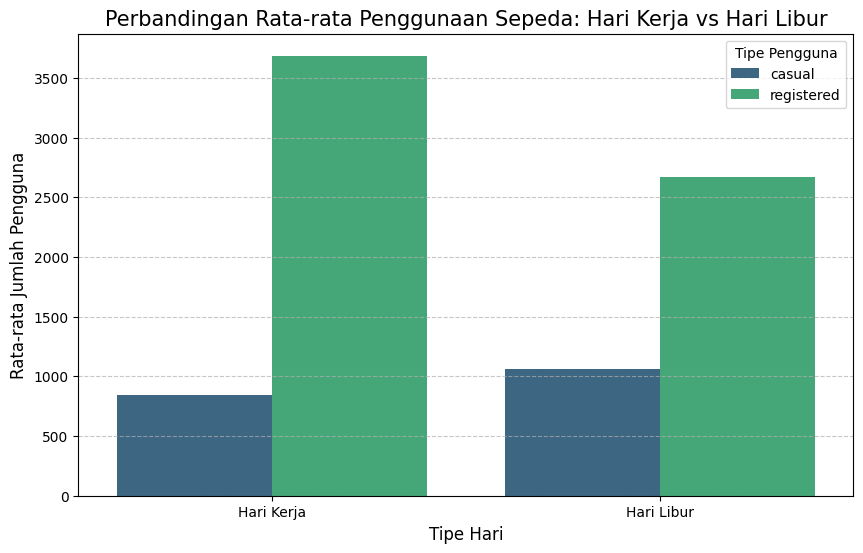

In [13]:
# Menghitung rata-rata penggunaan berdasarkan status holiday dan kategori pengguna
avg_usage_holiday = daily_data.groupby('holiday')[['casual', 'registered']].mean().reset_index()
avg_usage_holiday['holiday'] = avg_usage_holiday['holiday'].map({0: 'Hari Kerja', 1: 'Hari Libur'})

# Menyiapkan data untuk visualisasi
usage_pattern_melted = avg_usage_holiday.melt(id_vars='holiday', value_vars=['casual', 'registered'],
                                              var_name='Tipe Pengguna', value_name='Rata-rata Pengguna')

# Membuat visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(x='holiday', y='Rata-rata Pengguna', hue='Tipe Pengguna', data=usage_pattern_melted, palette='viridis')
plt.title('Perbandingan Rata-rata Penggunaan Sepeda: Hari Kerja vs Hari Libur', fontsize=15)
plt.xlabel('Tipe Hari', fontsize=12)
plt.ylabel('Rata-rata Jumlah Pengguna', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Tipe Pengguna')
plt.show()

**Insight:**
* Pengguna kasual (casual) menunjukkan preferensi yang kuat untuk menyewa sepeda pada hari libur, dengan jumlah rata-rata hampir dua kali lipat dibandingkan pada hari kerja. Hal ini mengindikasikan bahwa pengguna kasual cenderung menggunakan sepeda sewaan untuk kegiatan rekreasi atau liburan.
* Sebaliknya, pengguna terdaftar (registered) memiliki pola yang berbeda dengan penggunaan yang jauh lebih tinggi pada hari kerja dibandingkan hari libur. Ini menunjukkan bahwa pengguna terdaftar kemungkinan besar menggunakan sepeda sebagai moda transportasi utama untuk perjalanan harian seperti berangkat ke tempat kerja atau sekolah.
* Perbedaan pola ini memberikan insight penting bahwa dua kelompok pengguna memiliki kebutuhan dan perilaku yang berbeda, yang dapat dijadikan dasar untuk strategi pemasaran dan pengelolaan armada sepeda yang lebih efektif.

### Pertanyaan 2: Bagaimana distribusi penyewaan sepeda berdasarkan musim dan bagaimana pengaruhnya terhadap tipe pengguna (casual vs registered)?

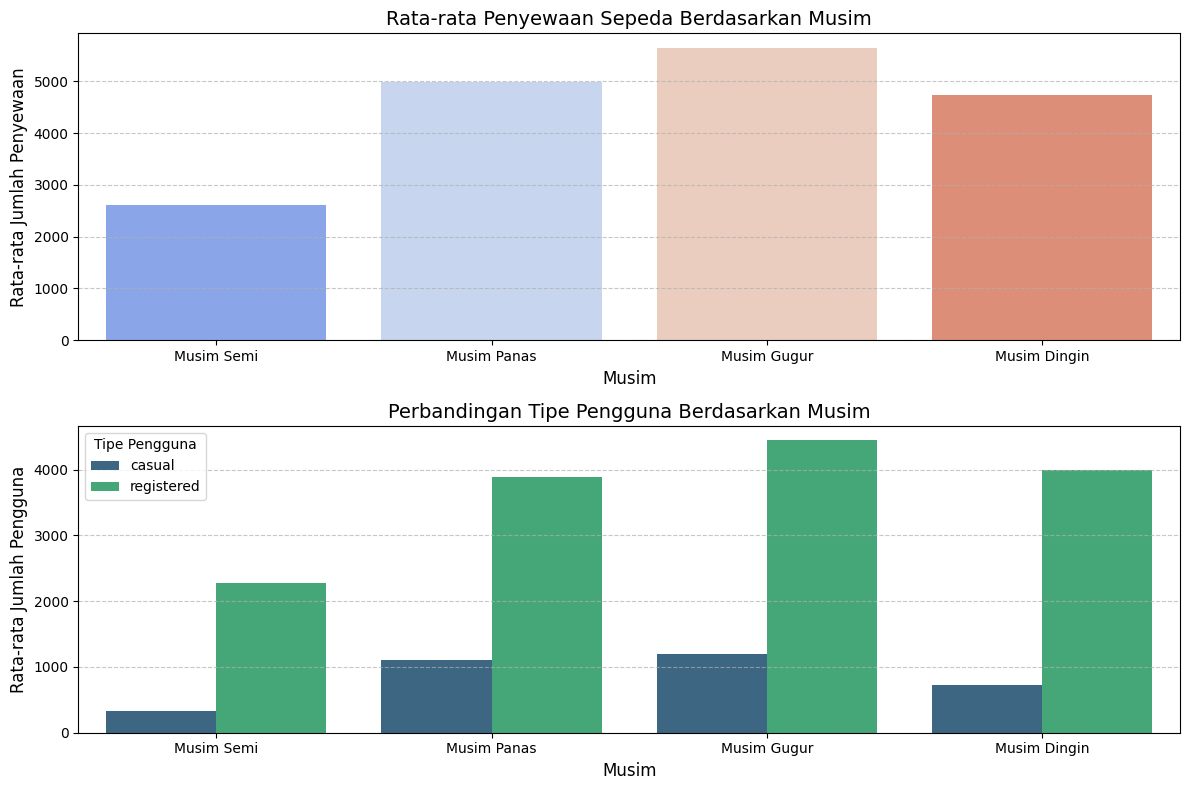

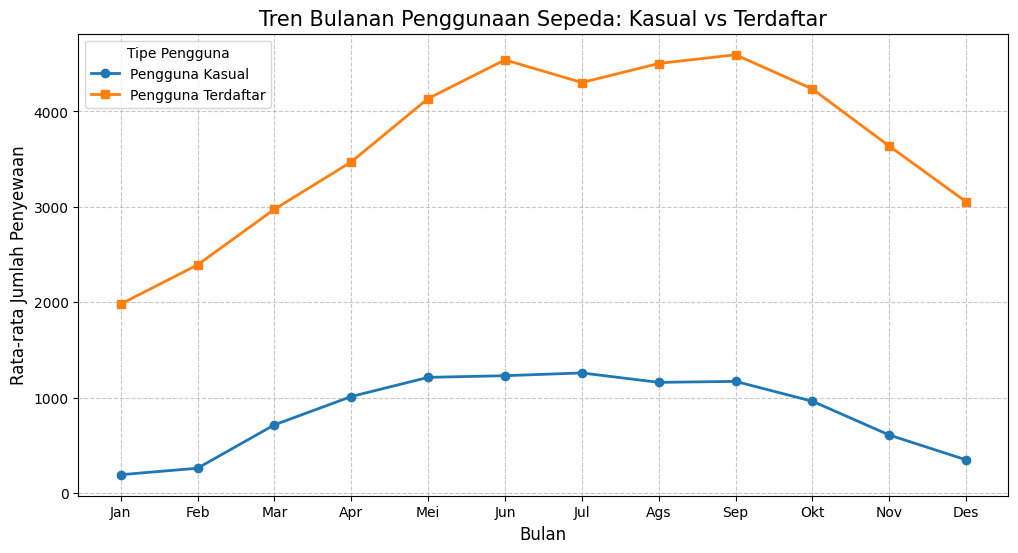

In [14]:
# Menambahkan kolom bulan
daily_data['month'] = daily_data['dteday'].dt.month

# Analisis berdasarkan musim
season_analysis = daily_data.groupby('season')[['casual', 'registered', 'cnt']].mean().reset_index()
season_mapping = {1: 'Musim Semi', 2: 'Musim Panas', 3: 'Musim Gugur', 4: 'Musim Dingin'}
season_analysis['season_name'] = season_analysis['season'].map(season_mapping)

# Membuat visualisasi berdasarkan musim
plt.figure(figsize=(12, 8))

# Subplot 1: Distribusi berdasarkan musim
plt.subplot(2, 1, 1)
sns.barplot(x='season_name', y='cnt', data=season_analysis, palette='coolwarm')
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Musim', fontsize=14)
plt.xlabel('Musim', fontsize=12)
plt.ylabel('Rata-rata Jumlah Penyewaan', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Subplot 2: Perbandingan tipe pengguna berdasarkan musim
plt.subplot(2, 1, 2)
user_season_melted = season_analysis.melt(id_vars=['season', 'season_name'],
                                          value_vars=['casual', 'registered'],
                                          var_name='Tipe Pengguna', value_name='Rata-rata Pengguna')
sns.barplot(x='season_name', y='Rata-rata Pengguna', hue='Tipe Pengguna', data=user_season_melted, palette='viridis')
plt.title('Perbandingan Tipe Pengguna Berdasarkan Musim', fontsize=14)
plt.xlabel('Musim', fontsize=12)
plt.ylabel('Rata-rata Jumlah Pengguna', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Tipe Pengguna')

plt.tight_layout()
plt.show()

# Analisis trend bulanan untuk tipe pengguna
monthly_trend = daily_data.groupby('month')[['casual', 'registered']].mean()

plt.figure(figsize=(12, 6))
plt.plot(monthly_trend.index, monthly_trend['casual'], marker='o', linewidth=2, label='Pengguna Kasual')
plt.plot(monthly_trend.index, monthly_trend['registered'], marker='s', linewidth=2, label='Pengguna Terdaftar')
plt.title('Tren Bulanan Penggunaan Sepeda: Kasual vs Terdaftar', fontsize=15)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Rata-rata Jumlah Penyewaan', fontsize=12)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Ags', 'Sep', 'Okt', 'Nov', 'Des'])
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Tipe Pengguna')
plt.show()

**Insight:**
* Terdapat pola musiman yang jelas dalam penggunaan layanan penyewaan sepeda. Musim gugur menjadi musim dengan rata-rata penyewaan tertinggi, diikuti oleh musim panas, musim dingin, dan musim semi memiliki rata-rata penyewaan terendah.
* Kedua tipe pengguna (kasual dan terdaftar) menunjukkan tren musiman yang serupa, dengan peningkatan penyewaan pada musim panas dan gugur, namun pengguna terdaftar tetap mendominasi di semua musim dengan jumlah yang signifikan lebih tinggi.
* Tren bulanan menunjukkan bahwa bulan-bulan hangat (Mei hingga Oktober) memiliki tingkat penyewaan tertinggi untuk kedua tipe pengguna, dengan puncaknya pada musim gugur (September-Oktober).
* Gap antara pengguna terdaftar dan kasual konsisten sepanjang tahun, namun sedikit mengecil pada bulan-bulan musim panas, menunjukkan adanya peningkatan pengguna kasual pada periode liburan dan cuaca yang lebih baik.

## Analisis Lanjutan: RFM Analysis untuk Pengguna Terdaftar

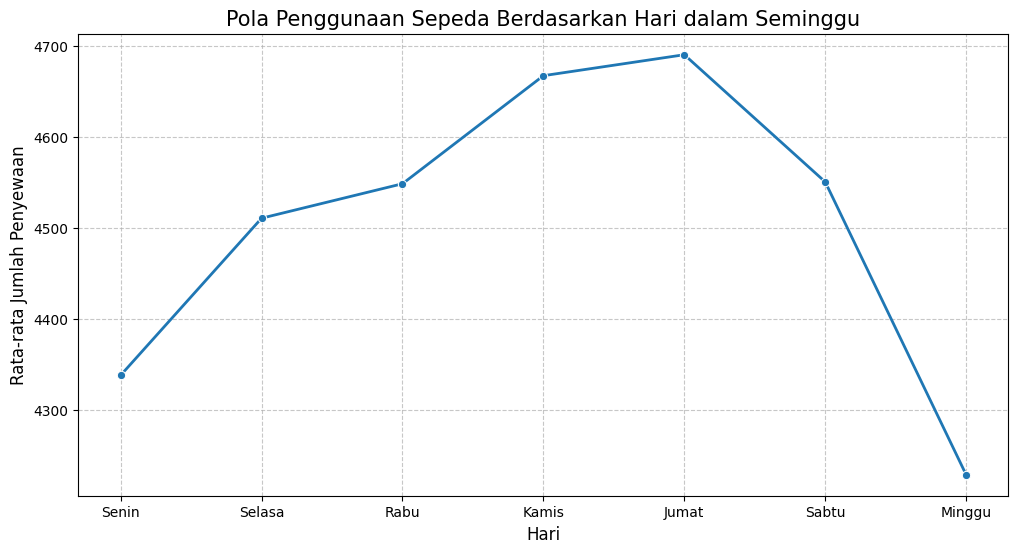

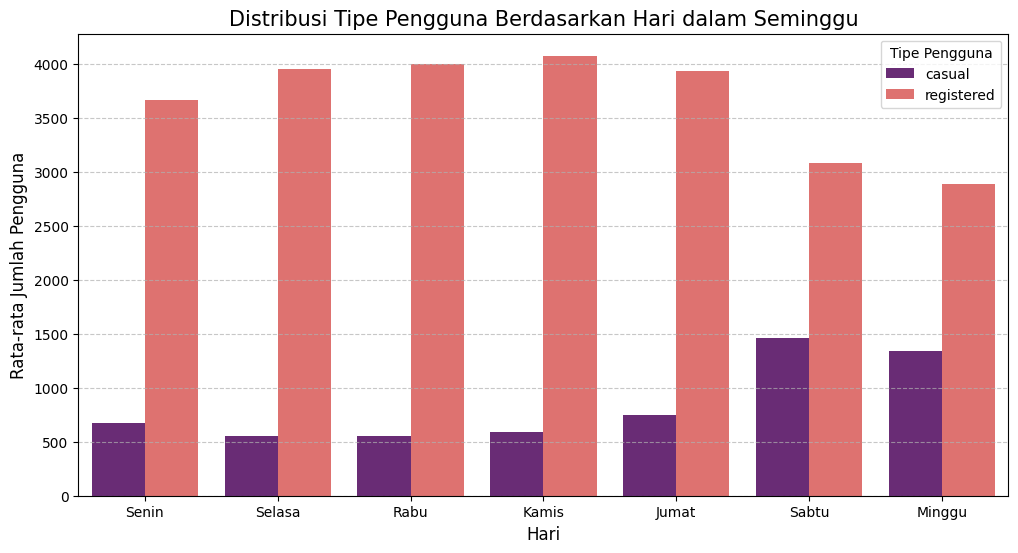

In [15]:
# Menyiapkan data untuk analisis lanjutan
# Karena kita tidak memiliki data individual pengguna, kita akan mensimulasikan analisis RFM
# berdasarkan segmentasi waktu (hari dalam seminggu)

# Menambahkan kolom hari dalam seminggu
daily_data['weekday'] = daily_data['dteday'].dt.dayofweek

# Analisis "Recency" - menghitung rata-rata penyewaan berdasarkan hari terakhir
# Untuk simulasi, kita gunakan hari dalam seminggu sebagai proxy
weekday_analysis = daily_data.groupby('weekday')[['casual', 'registered', 'cnt']].mean().reset_index()
weekday_mapping = {0: 'Senin', 1: 'Selasa', 2: 'Rabu', 3: 'Kamis', 4: 'Jumat', 5: 'Sabtu', 6: 'Minggu'}
weekday_analysis['day_name'] = weekday_analysis['weekday'].map(weekday_mapping)

# Visualisasi pola mingguan
plt.figure(figsize=(12, 6))
sns.lineplot(x='day_name', y='cnt', data=weekday_analysis, marker='o', linewidth=2)
plt.title('Pola Penggunaan Sepeda Berdasarkan Hari dalam Seminggu', fontsize=15)
plt.xlabel('Hari', fontsize=12)
plt.ylabel('Rata-rata Jumlah Penyewaan', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Distribusi pengguna berdasarkan hari dalam seminggu
plt.figure(figsize=(12, 6))
user_weekday_melted = weekday_analysis.melt(id_vars=['weekday', 'day_name'],
                                         value_vars=['casual', 'registered'],
                                         var_name='Tipe Pengguna', value_name='Rata-rata Pengguna')
sns.barplot(x='day_name', y='Rata-rata Pengguna', hue='Tipe Pengguna', data=user_weekday_melted, palette='magma')
plt.title('Distribusi Tipe Pengguna Berdasarkan Hari dalam Seminggu', fontsize=15)
plt.xlabel('Hari', fontsize=12)
plt.ylabel('Rata-rata Jumlah Pengguna', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Tipe Pengguna')
plt.show()

**Insight:**
* Pola mingguan menunjukkan bahwa akhir pekan (Sabtu dan Minggu) memiliki karakteristik penggunaan yang berbeda dibandingkan hari kerja (Senin-Jumat).
* Pengguna kasual memiliki puncak penyewaan di akhir pekan, sementara pengguna terdaftar memiliki pola penggunaan yang lebih tinggi pada hari kerja dan menurun di akhir pekan.
* Analisis ini dapat menjadi dasar untuk strategi "Recency" dalam pendekatan RFM, dimana perusahaan dapat menyesuaikan ketersediaan sepeda berdasarkan pola mingguan yang teridentifikasi.

In [16]:
# Menyimpan data yang sudah dibersihkan untuk digunakan di dashboard
daily_data.to_csv("main_data.csv", index=False)

## Conclusion

1. Perbedaan Pola Hari Kerja vs Libur: Pengguna kasual menunjukkan preferensi kuat untuk menyewa sepeda pada hari libur, sementara pengguna terdaftar lebih dominan pada hari kerja. Hal ini mengindikasikan bahwa pengguna kasual cenderung menggunakan sepeda untuk rekreasi, sedangkan pengguna terdaftar menggunakannya sebagai transportasi rutin.
2. Pengaruh Musim: Musim memiliki dampak signifikan terhadap jumlah penyewaan sepeda, dengan musim gugur dan musim panas menjadi periode dengan tingkat penyewaan tertinggi. Musim semi konsisten menjadi musim dengan tingkat penyewaan terendah, kemungkinan karena kondisi cuaca yang kurang mendukung.
3. Pola Mingguan: Terdapat pola mingguan yang jelas dalam penggunaan layanan penyewaan sepeda, dengan karakteristik berbeda antara hari kerja dan akhir pekan. Pengetahuan ini dapat dimanfaatkan untuk optimasi distribusi armada sepeda dan strategi pemasaran yang lebih tepat sasaran.
4. Kesenjangan Pengguna: Terdapat kesenjangan besar antara jumlah pengguna terdaftar dan pengguna kasual, yang menunjukkan bahwa program keanggotaan berhasil menarik mayoritas pelanggan untuk menjadi member. Hal ini mungkin disebabkan oleh keuntungan seperti diskon, kemudahan akses, atau program loyalitas yang ditawarkan kepada pengguna terdaftar.